# Create Subset of Data containing only messages from January 2021

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# load full data - group messages
groups = pd.read_csv('../data/selected_groups_total.csv.gzip', compression='gzip')

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_47671/879611167.py:2: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,21,26,27,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  groups = pd.read_csv('../data/selected_groups_total.csv.gzip', compression='gzip')


In [28]:
# load full data - channel messages
channels = pd.read_csv('../data/channel_subsample.csv.gzip', compression='gzip')

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_47671/936239714.py:2: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,25,30,31,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  channels = pd.read_csv('../data/channel_subsample.csv.gzip', compression='gzip')


In [29]:
# add group/channel column
groups['group_or_channel'] = 'group'
channels['group_or_channel'] = 'channel'

In [30]:
# reformat date columns
groups['date'] = pd.to_datetime(groups['posting_date']).dt.date
channels['date'] = pd.to_datetime(channels['posting_date']).dt.date

In [31]:
# filter down to only contain dates form January 2021
groups = groups[(groups['date'] >= pd.to_datetime('2021-01-01').date()) & (groups['date'] <= pd.to_datetime('2021-01-31').date())]
channels = channels[(channels['date'] >= pd.to_datetime('2021-01-01').date()) & (channels['date'] <= pd.to_datetime('2021-01-31').date())]

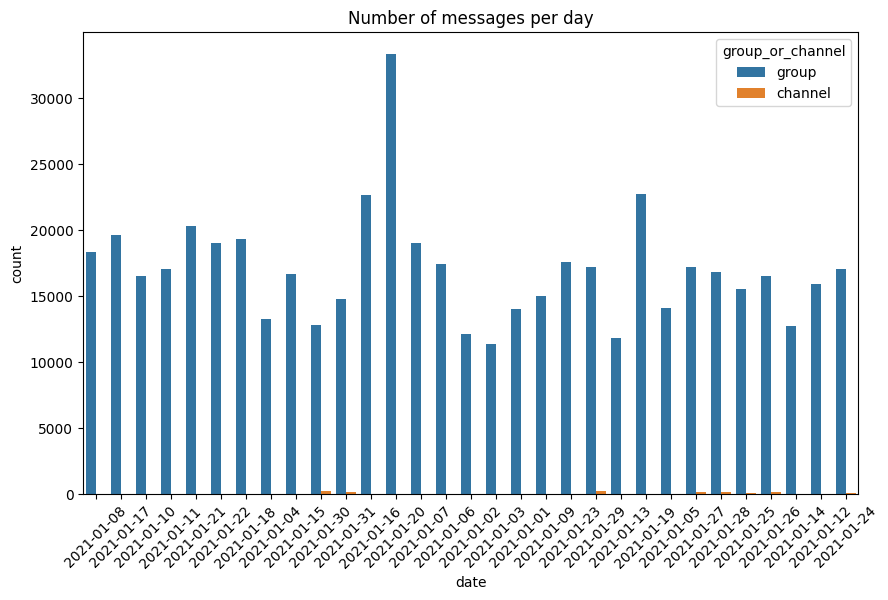

In [32]:
# plot number of messages per day
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=pd.concat([groups, channels]), x='date', hue='group_or_channel', ax=ax)
plt.xticks(rotation=45)
plt.title('Number of messages per day')
plt.show()

In [33]:
print(f'{len(groups)} group messages in January 2021')
print(f'{len(channels)} channel messages in January 2021')
print(f'{len(groups) + len(channels)} total messages in January 2021')

527643 group messages in January 2021
1250 channel messages in January 2021
528893 total messages in January 2021


In [34]:
# concat both
all_messages = pd.concat([groups, channels])

In [35]:
# display all columns
pd.set_option('display.max_columns', None)

In [36]:
all_messages.head()

,Unnamed: 0.1,Unnamed: 0,UID_key,initial_ID,mid_message,mid_file,group_name,posting_date,message,fwd_message,fwd_posting_date_message,posting_date_file,link_url,media_file,media_file_type,fwd_posting_date_file,fwd_link_url,fwd_media_file,fwd_media_file_type,author,fwd_author,day,week,weekday,message_hash,fwd_message_hash,website,replied_to,year,month,day_of_year,duration,filepath,filename,filename_if_joined,transcribed_message,newsguard_domain,newsguard_score,group_or_channel,date,fwd_urls,urls,newsguard_scores,fwd_regex,fwd_cryptocurrency,fwd_cryptolabel,regex,cryptocurrency,cryptolabel
203429,203429,213659,3690438197782804714237638,203413.0,369043.0,369043.0,1Research7Intelligence Room,2021-01-08 13:22:17+00:00,Der Floor bezeichnet die versch. Regierungseb...,NaN,NaN,2021-01-08 13:22:17+00:00,messages316.html#go_to_message369023,NaN,NaN,NaN,NaN,NaN,NaN,-7.735504e+17,NaN,2021-01-08 12:00:00+00:00,1.0,5.0,-6.001968e+18,NaN,NaN,3690238197782804714237638,2021.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group,2021-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203430,203430,213660,3690468197782804714237638,203414.0,369046.0,369046.0,1Research7Intelligence Room,2021-01-08 13:23:02+00:00,Hey... ich hab nicht alle post hier gesehen vo...,NaN,NaN,2021-01-08 13:23:02+00:00,messages316.html#go_to_message369041,NaN,NaN,NaN,NaN,NaN,NaN,-3.602820e+18,NaN,2021-01-08 12:00:00+00:00,1.0,5.0,1.849577e+18,NaN,NaN,3690418197782804714237638,2021.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group,2021-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203431,203431,213661,3690478197782804714237638,203415.0,369047.0,369047.0,1Research7Intelligence Room,2021-01-08 13:23:22+00:00,heisst aber nicht das jeder von denen böse is...,NaN,NaN,2021-01-08 13:23:22+00:00,messages316.html#go_to_message369037,NaN,NaN,NaN,NaN,NaN,NaN,7.705364e+18,NaN,2021-01-08 12:00:00+00:00,1.0,5.0,3.626339e+18,NaN,NaN,3690378197782804714237638,2021.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group,2021-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203432,203432,213662,3690538197782804714237638,203416.0,369053.0,369053.0,1Research7Intelligence Room,2021-01-08 13:24:06+00:00,Es laufen doch Ermittlungsverfahren gegen ihn ...,NaN,NaN,2021-01-08 13:24:06+00:00,messages313.html#go_to_message365092,NaN,NaN,NaN,NaN,NaN,NaN,-1.972016e+18,NaN,2021-01-08 12:00:00+00:00,1.0,5.0,7.669415e+18,NaN,NaN,3650928197782804714237638,2021.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group,2021-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203433,203433,213663,3690548197782804714237638,203417.0,369054.0,369054.0,1Research7Intelligence Room,2021-01-08 13:24:08+00:00,Nein sie muss ja auch schon sehr alt gewesen s...,NaN,NaN,2021-01-08 13:24:08+00:00,#go_to_message369046,NaN,NaN,NaN,NaN,NaN,NaN,6.059157e+18,NaN,2021-01-08 12:00:00+00:00,1.0,5.0,-3.502138e+18,NaN,NaN,3690468197782804714237638,2021.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group,2021-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# only keep relevant columns
all_messages = all_messages[['UID_key','author', 'message','fwd_message', 'date', 'transcribed_message', 'group_or_channel', 'group_name', 'fwd_author']]

In [38]:
all_messages.head()

,UID_key,author,message,fwd_message,date,transcribed_message,group_or_channel,group_name,fwd_author
203429,3690438197782804714237638,-7.735504e+17,Der Floor bezeichnet die versch. Regierungseb...,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,NaN
203430,3690468197782804714237638,-3.602820e+18,Hey... ich hab nicht alle post hier gesehen vo...,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,NaN
203431,3690478197782804714237638,7.705364e+18,heisst aber nicht das jeder von denen böse is...,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,NaN
203432,3690538197782804714237638,-1.972016e+18,Es laufen doch Ermittlungsverfahren gegen ihn ...,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,NaN
203433,3690548197782804714237638,6.059157e+18,Nein sie muss ja auch schon sehr alt gewesen s...,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,NaN


In [39]:
all_messages.to_csv('../data/january_2021_groups_and_channels.csv.gzip', compression='gzip')